# plot_TC_westerlyDays.ipynb

#### Robert Peal November 2024

- Plot the fraction of days with a TC present at each loaction, where there is a westerly in EEA

In [1]:
import xarray as xr
import sys
sys.path.append("/home/atuin/c104fa/c104fa10/utils")
import tctools2 as tct
import numpy as np
import matplotlib.pyplot as plt
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd

/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


#### User options

In [8]:
# Years and months
years = np.arange(1980,2023)
months = np.arange(1,13)

# Path to save the fractions to
fracSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/mjoClassFracs.{years[0]}.{years[-1]}.nc"
# # Path to save the days in each class to
# totalSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/mjoClassTotals.{years[0]}.{years[-1]}.pkl"

# Path to nc files with westerlies in
westerlyPath = "/home/atuin/c104fa/c104fa10/data/westerlies/eventDataTCv3/netcdfs/events_"
# Path to the swio state
swio_stateFile = "/home/atuin/c104fa/c104fa10/utils/swio_state/swio_state5.csv"
# Path to shapefile
region = "tanzania"
shapefilePath = f"/home/atuin/c104fa/c104fa10/data/shapefiles/{region}.shp"
# line specs
lon = 30.
latMin = -12.
latMax = 5.

# timeseries of days with a westerly over the line
lineWesterlyDaysLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.{lon:02.0f}E.{latMin:02.0f}_{latMax:02.0f}N.{years[0]}_{years[-1]}.csv"

# timeseries of days with a westerly over the line
lineWesterlyDaysNCLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.{lon:02.0f}E.{latMin:02.0f}_{latMax:02.0f}N.{years[0]}_{years[-1]}.nc"

# Seasons
seasons = [[1,2],[3,4,5],[6,7,8,9],[10,11,12]]
seasonLabels = ["JF","MAM","JJAS","OND"]


# MJO classes
mjoClasses = dict(favourable=[2,3,4],unfavourable=[1,5,6,7,8],inactive=[0])

# Where to save figure
figSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/TCWesterlyDaysFrac.{years[0]}.{years[-1]}_MAM"


#### Load data

In [9]:
swio_state = pd.read_csv(swio_stateFile,parse_dates=[0])

swio_state = swio_state.loc[swio_state["time"].dt.year.isin(years)]

lineWesterlyDays = pd.read_csv(lineWesterlyDaysLoc,parse_dates=[0])

lineWesterlyDays = lineWesterlyDays.loc[lineWesterlyDays["time"].dt.year.isin(years)]

lineWesterlyDaysSeries = xr.open_dataset(lineWesterlyDaysNCLoc)

swio_state = swio_state.merge(lineWesterlyDays)

# swio_state = swio_state.loc[swio_state["time"].dt.month.isin(months)]

shapefile = gpd.read_file(shapefilePath)

swio_state = swio_state.loc[swio_state["time"].dt.month.isin(months)]
swio_state

,time,RMM amplitude,RMM phase,MJO phase,tc count,min distance,count inside 500 km,LAT,LON,SID,...,tanzaniaWesterlyPrecipFrac,tanzaniaTCWesterlyPrecipAmnt,tanzaniaWesterlyPrecipAmnt,tanzaniaTCWesterlyFrac,tanzaniaWesterlyFrac,longitude,level,quantile,westerlyMask,tc_westerlyMask
0,1980-01-01,0.814303,3.895956,0.0,1.0,6.361932e+06,0.0,-15.2000,80.500,1980002S15081,...,0.511915,0.0,5.665789,0.0,0.134758,30.0,700,0.7,0,0
1,1980-01-02,0.705713,3.946428,0.0,1.0,5.933412e+06,0.0,-14.0000,78.400,1980002S15081,...,0.000000,0.0,0.000000,0.0,0.000000,30.0,700,0.7,0,0
2,1980-01-03,0.663776,4.071391,0.0,0.0,inf,0.0,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.0,0.000000,30.0,700,0.7,0,0
3,1980-01-04,0.650896,4.425780,0.0,1.0,1.610731e+07,0.0,-13.6333,120.167,1980005S14120,...,0.000000,0.0,0.000000,0.0,0.000000,30.0,700,0.7,0,0
4,1980-01-05,0.857257,4.776086,0.0,2.0,2.053283e+06,0.0,-12.0000,56.000,1980005S11059,...,0.488085,0.0,3.556500,0.0,0.180772,30.0,700,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2022-12-27,1.605746,4.802709,5.0,2.0,6.562400e+06,0.0,-18.7000,81.900,2022352S12093,...,0.000000,0.0,0.000000,0.0,0.000000,30.0,700,0.7,0,0
15702,2022-12-28,1.538229,4.972983,5.0,2.0,5.429633e+06,0.0,-20.9000,76.300,2022352S12093,...,0.000000,0.0,0.000000,0.0,0.000000,30.0,700,0.7,0,0
15703,2022-12-29,1.584863,5.416929,6.0,2.0,4.665755e+06,0.0,-24.5000,71.400,2022352S12093,...,0.511915,0.0,8.783701,0.0,0.000000,30.0,700,0.7,1,0
15704,2022-12-30,1.651366,5.760738,6.0,2.0,4.485566e+06,0.0,-28.4000,69.100,2022352S12093,...,0.000000,0.0,0.000000,0.0,0.000000,30.0,700,0.7,0,0


In [14]:
swio_state.loc[swio_state["time"].dt.month.isin([1,2])]["westerlyMask"].sum()
# swio_state.shape[0]

843

#### Calculate which box each TC is in

In [25]:
# Columns specifying if westerlies were present
westerlyColumn = "westerlyMask"
tcWesterlyColumn = "tc_westerlyMask"

# Define the longitude and latitude boundaries
lon_min, lon_max = 30, 140
lat_min, lat_max = -50, 50
box_size = 5  # 5-degree boxes

# locations of lon and lat centres
lonCentres = np.arange(lon_min + 0.5*box_size,lon_max + 0.5*box_size,box_size)
latCentres = np.arange(lat_min + 0.5*box_size,lat_max + 0.5*box_size,box_size)

# Number of lon and lat boxes
nlons = lonCentres.shape[0]
nlats = latCentres.shape[0]

# Get only days with a TC
tcData = swio_state.loc[~np.isnan(swio_state["LON"].values)][['time','LON','LAT',"SID","MJO phase",tcWesterlyColumn,westerlyColumn]]

# Calculate the box indices for each report
tcData['BOX_LON'] = ((tcData['LON'] - lon_min) // box_size).astype(int)
tcData['BOX_LAT'] = ((lat_max - tcData['LAT']) // box_size).astype(int)

# Combine indices to create a unique box identifier
tcData['BOX_ID'] = 'Box_' + tcData['BOX_LAT'].astype(str) + '_' + tcData['BOX_LON'].astype(str)

totalGrids = {}
eeaWesterlyGrids = {}

fracTotals = {}

for className, phases in mjoClasses.items(): # Iterate through the phase classes

    # Select only the days in the MJO class
    classTCData = tcData.loc[tcData["MJO phase"].isin(phases)]

    # Count the number of reports in each box
    box_counts = classTCData['BOX_ID'].value_counts().reset_index()
    box_counts.columns = ['BOX_ID', 'Count']

    # Extract center coordinates for each box
    box_counts['IX_LON_CENTER'] = box_counts['BOX_ID'].str.split('_').str[2].astype(int)
    box_counts['IX_LAT_CENTER'] = box_counts['BOX_ID'].str.split('_').str[1].astype(int)

    # Calculate the count of tc westerly days in each box
    boxTCWesterlyDays = classTCData.loc[classTCData[tcWesterlyColumn] > 0].groupby('BOX_ID').size().reset_index(name=tcWesterlyColumn)

    # Merge this count into the box_counts DataFrame
    box_counts = box_counts.merge(boxTCWesterlyDays, on='BOX_ID', how='left')

    # Fill any NaN values in 'EEATCwesterlyFrac_Count' with 0 (for boxes with no EEATCwesterlyFrac > 0)
    box_counts[tcWesterlyColumn].fillna(0, inplace=True)

    # Create a 2D grid for counts of total reports
    countGrid = np.zeros((nlats, nlons)) # Number of TCs in each grid box
    eeaWesterlyGrid = np.zeros((nlats, nlons)) # Number of TCs causing precip in each gridbox

    # Populate the grid with counts from box_counts
    for _, row in box_counts.iterrows():
        # Use box indices (row['BOX_LAT'], row['BOX_LON']) to place data in the grid
        countGrid[int(row['IX_LAT_CENTER']), int(row['IX_LON_CENTER'])] = row['Count']
        eeaWesterlyGrid[int(row['IX_LAT_CENTER']), int(row['IX_LON_CENTER'])] = row[tcWesterlyColumn]

    # eeaWesterlyGrid = np.where(countGrid > 20.,eeaWesterlyGrid,0)
    # countGrid = np.where(countGrid > 20.,countGrid,0)

    totalGrids[className] = countGrid
    eeaWesterlyGrids[className] = eeaWesterlyGrid

    # fraction of days with precip
    fracTotals[className] =  (classTCData[westerlyColumn] > 0).sum() / classTCData.shape[0]
     

#### Plot the probability of TC in each box leading to TCWMTE

/tmp/ipykernel_760090/1706543924.py:34: RuntimeWarning: invalid value encountered in divide
  data = eeaWesterlyGrids[className] / totalGrids[className]
/tmp/ipykernel_760090/1706543924.py:44: RuntimeWarning: invalid value encountered in divide
  data = eeaWesterlyGrids[className] / totalGrids[className] - fracTotals[className]


Saving to /home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/TCWesterlyDaysFrac.1980.2022_MAM


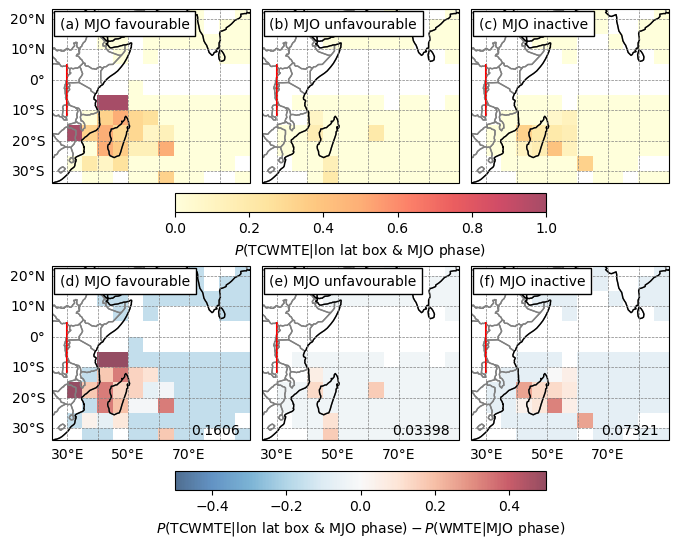

In [26]:
dpi=300
cmPerInch = 2.54
figsize = (17,13.6)
imshowextent=[lon_min,lon_max,lat_min,lat_max] 
plotextent = [25, 90, -30, 20]

letters = ['a','b','c','d','e','f']

cmapTotal = plt.get_cmap('YlOrRd')
vminTotal=0
vmaxTotal=1
levelsTotal = np.arange(0,1.1,0.1)

cmapChange = plt.get_cmap('RdBu_r')
levelsChange = np.arange(-0.5,0.6,0.1)
vminChange=-0.5
vmaxChange=0.5

fig,axs = tct.new_map_axes(nrows=2,ncols=3,figsize=(figsize[0] / cmPerInch, figsize[1] / cmPerInch),gridlines=False)

# Define the grid size based on the lat/lon range and box size
lon_bins = (lon_max - lon_min) // box_size
lat_bins = (lat_max - lat_min) // box_size


# 1st row shows overall probability
rowaxs = axs[0]

for classix, className in enumerate(mjoClasses.keys()): # iterate through MJO classes

    classaxs = axs[:,classix]
    ## 1st row shows actual probability
    ax=classaxs[0]
    data = eeaWesterlyGrids[className] / totalGrids[className]

    # Plot the map
    # imActual = ax.pcolormesh(lonCentres,np.flip(latCentres),data,cmap=cmapTotal,levels=levelsTotal,alpha=0.7)
    imActual = ax.imshow(data, extent=imshowextent, 
                origin='upper', cmap=cmapTotal,vmin=vminTotal,vmax=vmaxTotal, alpha=0.7, interpolation='nearest')
    
    ## 2nd row shows change in probability
    # calculate the change in probability
    ax=classaxs[1]
    data = eeaWesterlyGrids[className] / totalGrids[className] - fracTotals[className]

    # Plot the map
    # imChange = ax.pcolormesh(lonCentres,np.flip(latCentres),data,cmap=cmapChange,levels=levelsChange,alpha=0.7)
    imChange = ax.imshow(data, extent=imshowextent, 
                origin='upper', cmap=cmapChange,vmin=vminChange,vmax=vmaxChange, alpha=0.7, interpolation='nearest')
    
    ax.text(0.95,0.02,f"{fracTotals[className]:.4g}",transform=ax.transAxes,ha="right",va="bottom")

    ## Now decorate
    for irow, ax in enumerate(classaxs):
        ax.set_extent(plotextent)
        # Add gridlines with labels only on the outer subplots
        gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), color='gray', linestyle='--', linewidth=0.5)
        # Configure which gridline labels appear based on subplot position
        if classix != 0:  # left labels only on left most plots
            gl.left_labels = False
        if irow == 0: # bottom labels only on lower plots
            gl.bottom_labels = False
        gl.right_labels = False
        gl.top_labels = False
        ax.vlines(lon,latMin,latMax,color="red")
        ax.text(0.04,0.915,f"({letters[classix+irow*3]}) MJO {className}",transform=ax.transAxes,ha="left",va="center",bbox=dict(facecolor='white', edgecolor='black'))


# # Add the plot label
# for i, ax in enumerate(axs.ravel()):
#     
    
plt.colorbar(imActual,ax=axs[0],orientation="horizontal",shrink=0.6,label="$P($TCWMTE|lon lat box & MJO phase$)$") # colorbar for top row
plt.colorbar(imChange,ax=axs[1],orientation="horizontal",shrink=0.6,label="$P($TCWMTE|lon lat box & MJO phase$) - P($WMTE|MJO phase$)$") # colorbar for bottom

print(f"Saving to {figSaveLoc}")
plt.savefig(f"{figSaveLoc}.pdf",dpi=dpi,bbox_inches='tight')
plt.savefig(f"{figSaveLoc}.tif",dpi=dpi,bbox_inches='tight')

#### Now we plot the locations along the line with enhancement

In [12]:
tcData

,time,LON,LAT,SID,MJO phase,tc_westerlyMask,westerlyMask,BOX_LON,BOX_LAT,BOX_ID
0,1980-01-01,80.500,-15.2000,1980002S15081,0.0,0,0,10,13,Box_13_10
1,1980-01-02,78.400,-14.0000,1980002S15081,0.0,0,0,9,12,Box_12_9
3,1980-01-04,120.167,-13.6333,1980005S14120,0.0,0,0,18,12,Box_12_18
4,1980-01-05,56.000,-12.0000,1980005S11059,0.0,0,1,5,12,Box_12_5
5,1980-01-06,118.433,-14.9333,1980005S14120,0.0,0,1,17,12,Box_12_17
...,...,...,...,...,...,...,...,...,...,...
15701,2022-12-27,81.900,-18.7000,2022352S12093,5.0,0,0,10,13,Box_13_10
15702,2022-12-28,76.300,-20.9000,2022352S12093,5.0,0,0,9,14,Box_14_9
15703,2022-12-29,71.400,-24.5000,2022352S12093,6.0,0,1,8,14,Box_14_8
15704,2022-12-30,69.100,-28.4000,2022352S12093,6.0,0,0,7,15,Box_15_7


In [7]:
westerlyDaysDist = {}

lineWesterlyDaysSeries = xr.open_dataset("/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.30E.-12_05N.1980_2022.nc") # nc data with shape time, latitude, showing the days with events at each location along the line

totalGrids = {}
eeaWesterlyGrids = {}

fracTotals = {}

lon_min2 = 35
lon_max2=55
lat_min2 = -25
lat_max2=-15


yearsTcData = tcData.loc[tcData["time"].isin(lineWesterlyDaysSeries["time"].values)]
tcsFavourableArea = yearsTcData.loc[yearsTcData["LON"].between(lon_min2,lon_max2) & yearsTcData["LAT"].between(lat_min2,lat_max2)] # days with a TC in the area of interest

# for seasonix,season in enumerate(seasons): # Iterate through the seasons

#     seasonTCsFavourableAreaDatesList  = tcsFavourableArea.loc[tcsFavourableArea["time"].dt.month.isin(season)]["time"].values

westerlySeriesTCsFavourableArea = lineWesterlyDaysSeries.sel(time=tcsFavourableArea["time"].values) # westerly mask, on days with a TC in the area of interest

numberTCDays = tcsFavourableArea.shape[0]
numberDays = yearsTcData.shape[0]

tcFraction = westerlySeriesTCsFavourableArea["tc_westerlyMask"].sum(dim="time") / numberTCDays
ovrlFraction = lineWesterlyDaysSeries["westerlyMask"].sum(dim="time") / numberDays

ovrlFraction

<xarray.DataArray 'westerlyMask' (latitude: 69)>
array([0.02607287, 0.02218623, 0.01781377, 0.01441296, 0.01004049,
       0.00744939, 0.00469636, 0.00259109, 0.00129555, 0.0011336 ,
       0.00080972, 0.00064777, 0.00048583, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00016194, 0.00016194, 0.00048583, 0.00048583,
       0.00048583, 0.00032389, 0.00016194, 0.00032389, 0.00064777,
       0.00080972, 0.00080972, 0.00080972, 0.00032389, 0.        ,
       0.00032389, 0.00275304, 0.00534413, 0.00874494, 0.01068826,
       0.01327935, 0.01927126, 0.02267206, 0.02720648, 0.03352227,
       0.04388664, 0.05603239, 0.06769231, 0.07773279, 0.0859919 ,
       0.088583  , 0.09506073, 0.10477733, 0.11336032, 0.12242915,
       0.12469636, 0.13603239, 0.14396761, 0.15044534, 0.15449393,
       0.15303644, 0.14866397, 0.14688259, 0.14396761, 0.14105263,
       0.1417004 , 0.13991903, 0.13846154, 0.13959514])
Coordinates:
    longitude  float32 ...
  * latitude   (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level      int32 ...
    quantile   float64 ...

In [6]:
lineWesterlyDaysSeries

<xarray.Dataset>
Dimensions:          (latitude: 69, time: 15706)
Coordinates:
    longitude        float32 ...
  * latitude         (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level            int32 ...
  * time             (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
    quantile         float64 ...
Data variables:
    westerlyMask     (time, latitude) int64 ...
    tc_westerlyMask  (time, latitude) int64 ...

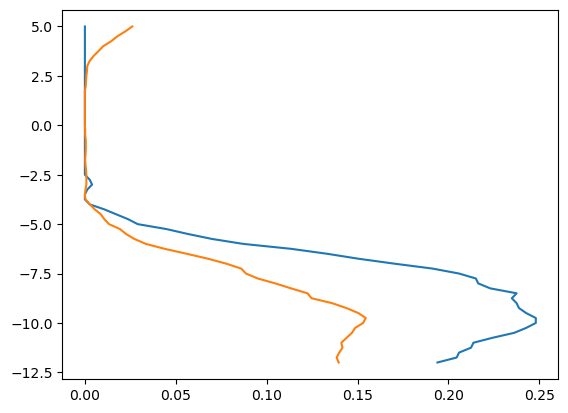

In [8]:
plt.plot(tcFraction.values,tcFraction["latitude"])
plt.plot(ovrlFraction.values,ovrlFraction["latitude"])

In [21]:
numberTCDays

7

In [22]:
lineWesterlyDaysSeries["westerlyMask"].sum(dim="time")

<xarray.DataArray 'westerlyMask' (latitude: 69)>
array([ 3,  2,  2,  1,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  4,  5,  7,  8, 10, 12, 14, 17, 17,
       17, 21, 22, 26, 25, 28, 30, 30, 35, 35, 36, 37, 39, 38, 40, 40, 41,
       42])
Coordinates:
    longitude  float32 ...
  * latitude   (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level      int32 ...
    quantile   float64 ...

In [14]:
westerlySeriesTCsFavourableArea["westerlyMask"]

<xarray.DataArray 'westerlyMask' (time: 0, latitude: 1)>
array([], shape=(0, 1), dtype=int64)
Coordinates:
    longitude  float32 ...
  * latitude   (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level      int32 ...
  * time       (time) datetime64[ns] 
    quantile   float64 ...

In [48]:
tcData.loc[tcData["LON"].between(lon_min2,lon_max2)]

,time,LON,LAT,SID,MJO phase,tc_westerlyMask,westerlyMask,BOX_LON,BOX_LAT,BOX_ID
14018,2018-05-19,43.75,10.35,2018136N11054,2.0,0,0,2,7,Box_7_2
14198,2018-11-15,44.40,-7.20,2018309S06068,0.0,0,0,2,11,Box_11_2


In [30]:
tcsFavourableArea

,time,LON,LAT,SID,MJO phase,tc_westerlyMask,westerlyMask,BOX_LON,BOX_LAT,BOX_ID
9,1980-01-10,44.100,-20.300,1980010S20043,0.0,0,0,2,14,Box_14_2
415,1981-02-19,43.975,-15.175,1981048S12055,7.0,1,1,2,13,Box_13_2
416,1981-02-20,43.900,-17.025,1981048S12055,7.0,1,1,2,13,Box_13_2
721,1981-12-22,41.750,-16.500,1981351S12060,7.0,0,0,2,13,Box_13_2
765,1982-02-04,42.600,-18.025,1982030S15065,7.0,0,0,2,13,Box_13_2
...,...,...,...,...,...,...,...,...,...,...
15378,2022-02-07,41.800,-24.600,2022027S16084,3.0,1,1,2,14,Box_14_2
15387,2022-02-16,44.700,-16.700,2022044S15061,3.0,0,1,2,13,Box_13_2
15409,2022-03-10,42.100,-15.900,2022067S16050,1.0,0,0,2,13,Box_13_2
15455,2022-04-25,40.800,-21.100,2022114S18040,0.0,0,0,2,14,Box_14_2


In [ ]:
tcsFavourableArea

#### Alternative approach using Kernel density

In [21]:
def place_normalized_gaussian(array, center_lat, center_lon, sigma=1):
    """
    Places a normalized 2D Gaussian distribution (PDF) centered at the specified latitude 
    and longitude on the xarray DataArray. The Gaussian is normalized so that the total area under
    the curve is 1.
    
    Parameters:
        array (xr.DataArray): The xarray DataArray where the Gaussian will be added.
                              Assumes coordinates "lat" and "lon" are present.
        center_lat (float): Latitude of the Gaussian center.
        center_lon (float): Longitude of the Gaussian center.
        sigma (float): The standard deviation of the Gaussian in degrees.
        
    Returns:
        xr.DataArray: The xarray DataArray with the normalized Gaussian added.
    """
    
    # Create 2D grids of lat and lon coordinates
    lat = array.coords['latitude']
    lon = array.coords['longitude']
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    
    # Calculate the distance from the center for each grid point
    lat_distance = lat_grid - center_lat
    lon_distance = lon_grid - center_lon
    
    # Gaussian function in 2D with normalization
    gaussian = (1 / (2 * np.pi * sigma**2)) * np.exp(-((lat_distance**2 + lon_distance**2) / (2 * sigma**2)))
    
    # Create a DataArray for the Gaussian and add it to the original array
    gaussian_da = xr.DataArray(gaussian, coords=array.coords, dims=array.dims)
    
    return array + gaussian_da

In [22]:
arr = xr.open_dataset("/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/mjoClassFracs.2015.2019.nc")["JF"].isel(MJO_class=0)

In [23]:
sigma = 2.5

# Get only days with a TC
tcData = swio_state.loc[~np.isnan(swio_state["LON"].values)][['LON','LAT',"MJO phase",'EEATCWesterlyFrac']]

totalGrids = {}
eeaWesterlyGrids = {}

fracTotals = {}

for className, phases in mjoClasses.items(): # Iterate through the phase classes

    print(f"Working on {className}")

    # Select only the days in the MJO class
    classTCData = tcData.loc[tcData["MJO phase"].isin(phases)]

    countGrid = xr.zeros_like(arr) # Empty array for summing the TC locations
    westerlyGrid = xr.zeros_like(arr) # Empty array for summing the TC locations with a westerly


    for _, row in classTCData.iterrows():

        countGrid = place_normalized_gaussian(countGrid, row["LAT"], row["LON"], sigma=sigma)

        if row["EEATCWesterlyFrac"] > 0:
            westerlyGrid = place_normalized_gaussian(westerlyGrid, row["LAT"], row["LON"], sigma=sigma)

    totalGrids[className] = countGrid
    eeaWesterlyGrids[className] = westerlyGrid


    fracTotals[className] =  (classTCData['EEATCWesterlyFrac'] > 0).sum() / classTCData.shape[0]

Working on favourable
Working on unfavourable
Working on inactive


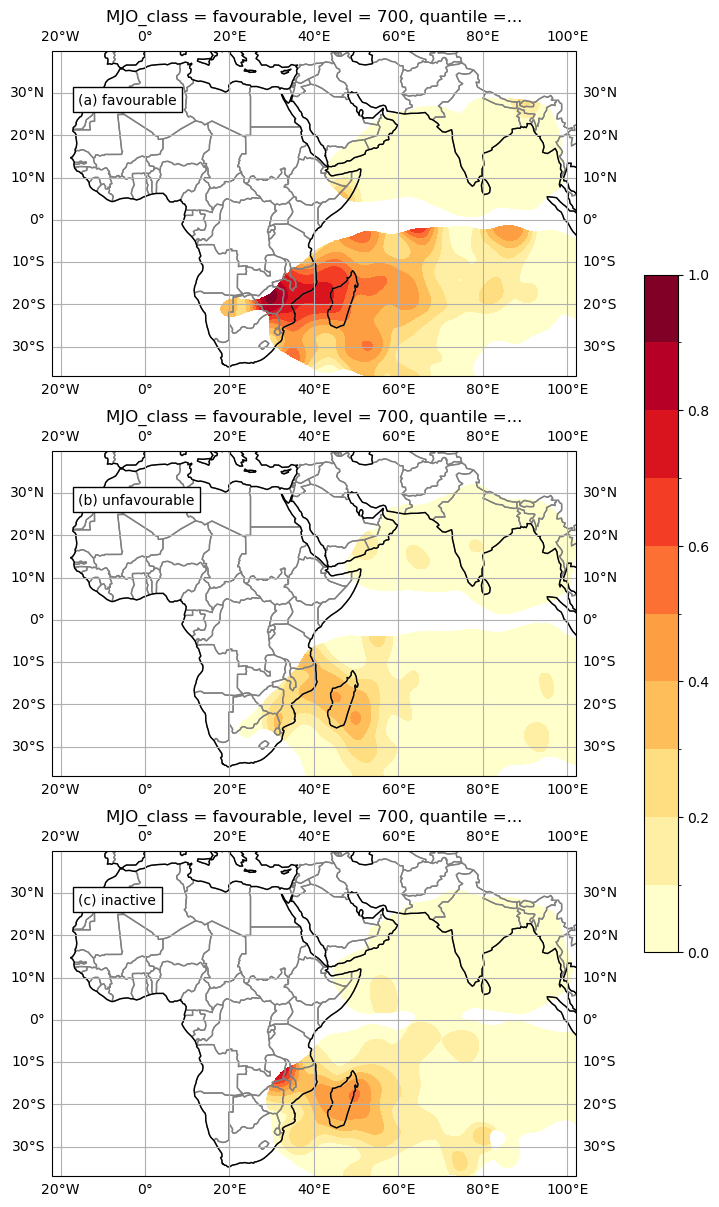

In [24]:
letters = ['a','b','c']
cmap = plt.get_cmap('YlOrRd')
levels = np.arange(0,1.1,0.1)

fig,axs = tct.new_map_axes(nrows=3,ncols=1)

# Define the grid size based on the lat/lon range and box size
lon_bins = (lon_max - lon_min) // box_size
lat_bins = (lat_max - lat_min) // box_size


for classix, className in enumerate(mjoClasses.keys()):

    data = eeaWesterlyGrids[className] /  totalGrids[className] # 

    data = data.where(totalGrids[className] > (2 / (2 * np.pi * sigma**2)), np.nan)

    ax=axs[classix]

    # We specify the extent to map it to the lon/lat coordinates
    im = data.plot.contourf(ax=ax,cmap=cmap,levels=levels,add_colorbar=False)
    

    ax.text(0.05,0.85,f"({letters[classix]}) {className}",transform=ax.transAxes,ha="left",va="center",bbox=dict(facecolor='white', edgecolor='black'))#, boxstyle='round,pad=1'))

    
plt.colorbar(im,ax=axs,shrink=0.6)